In [159]:
import pandas as pd
import numpy as np
import seaborn as sns
pyplot as pltimport matplotlib.
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
import warnings
from collections import Counter
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier, BaggingClassifier,
    ExtraTreesClassifier, GradientBoostingClassifier, VotingClassifier
)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from imblearn.over_sampling import SMOTE
import pickle

warnings.filterwarnings('ignore')

In [160]:
encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']
file_path = 'spam.csv'
df = None
for encoding in encodings:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print(f"File successfully read with encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Failed to read with encoding: {encoding}")
        continue

if df is None:
    raise Exception("All encoding attempts failed. Unable to read the CSV file")

Failed to read with encoding: utf-8
File successfully read with encoding: latin1


In [161]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2370,ham,"That day Ì_ say Ì_ cut ur hair at paragon, is ...",NaN,NaN,NaN
638,ham,"What will we do in the shower, baby?",NaN,NaN,NaN
1737,ham,I cant pick the phone right now. Pls send a me...,NaN,NaN,NaN
2651,ham,"Text me when you get off, don't call, my phone...",NaN,NaN,NaN
3420,spam,Welcome! Please reply with your AGE and GENDER...,NaN,NaN,NaN


In [162]:
 df.shape

(5572, 5)

In [117]:
# 1. Data Cleaning
# 2. EDA
# 3. Text preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

# 1. Data cleaning

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [166]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [167]:
df.sample(5)

,v1,v2
4939,ham,ÌÏ go home liao? Ask dad to pick me up at 6...
5061,ham,Havent stuck at orchard in my dad's car. Going...
1850,ham,Then cant get da laptop? My matric card wif Ì_...
718,spam,You have WON a guaranteed å£1000 cash or a å£2...
1202,ham,"Me also da, i feel yesterday night wait til 2..."


In [168]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [169]:
df.sample(5)

,target,text
1214,ham,I'll text now! All creepy like so he won't thi...
2332,ham,We are both fine. Thanks
3347,ham,"Sorry, I'll call later"
1199,ham,NEFT Transaction with reference number &lt;#&...
1341,ham,Just chill for another 6hrs. If you could slee...


In [170]:
encoder = LabelEncoder()

In [171]:
df['target'] = encoder.fit_transform(df['target'])
df.drop_duplicates(inplace=True)

In [172]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [173]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [174]:
df.duplicated().sum()

0

In [176]:
df = df.drop_duplicates(keep='first')

In [177]:
df.duplicated().sum()

0

In [178]:
df.sum()

target                                                  653
text      Go until jurong point, crazy.. Available only ...
dtype: object

In [134]:
df.shape

(5169, 2)

# eda

In [179]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [180]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

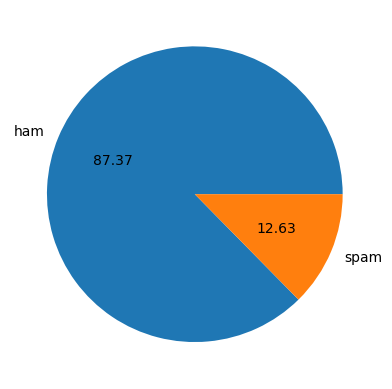

In [24]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [25]:
import nltk

In [27]:
!pip install nltk

In [28]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Majors\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [142]:
df['num_characters'] = df['text'].apply(len)

In [143]:
df.head()

,target,text,num_words,num_sentences,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111
1,0,Ok lar... Joking wif u oni...,8,2,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155
3,0,U dun say so early hor... U c already then say...,13,1,49
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,61


In [144]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [145]:
df.head()

,target,text,num_words,num_sentences,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111
1,0,Ok lar... Joking wif u oni...,8,2,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155
3,0,U dun say so early hor... U c already then say...,13,1,49
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,61


In [146]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [147]:
df.head()

,target,text,num_words,num_sentences,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",24,2,111
1,0,Ok lar... Joking wif u oni...,8,2,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,2,155
3,0,U dun say so early hor... U c already then say...,13,1,49
4,0,"Nah I don't think he goes to usf, he lives aro...",15,1,61


In [148]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [149]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [150]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [151]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

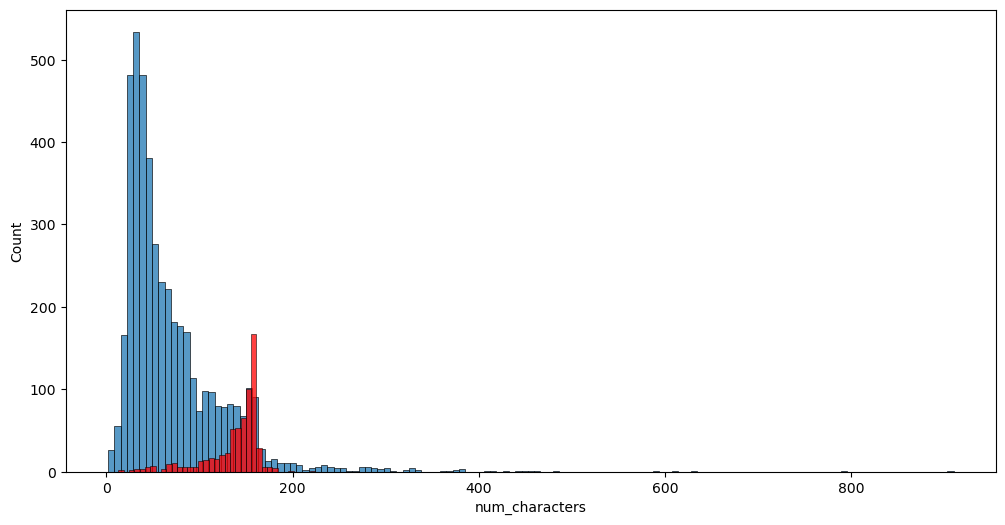

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] ==0]['num_characters'])
sns.histplot(df[df['target'] ==1]['num_characters'],color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

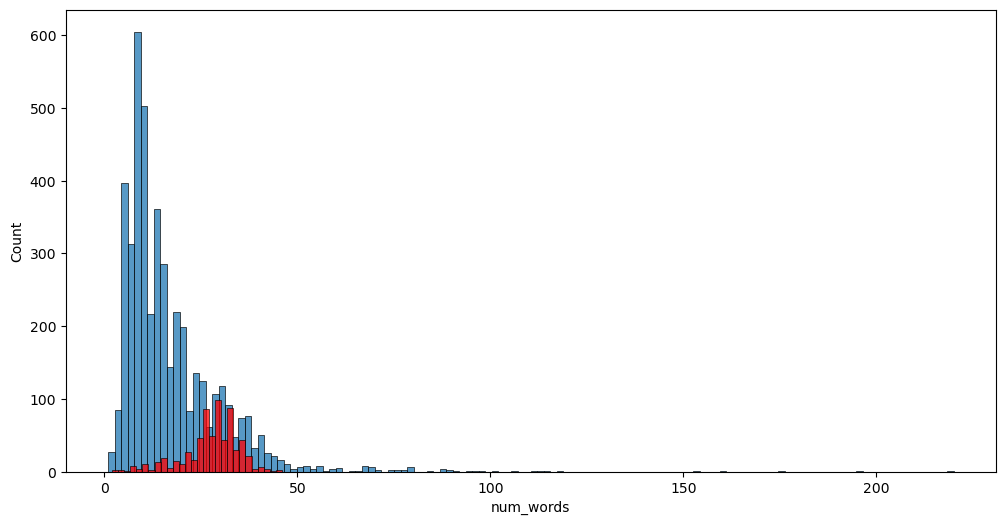

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] ==0]['num_words'])
sns.histplot(df[df['target'] ==1]['num_words'],color = 'red')

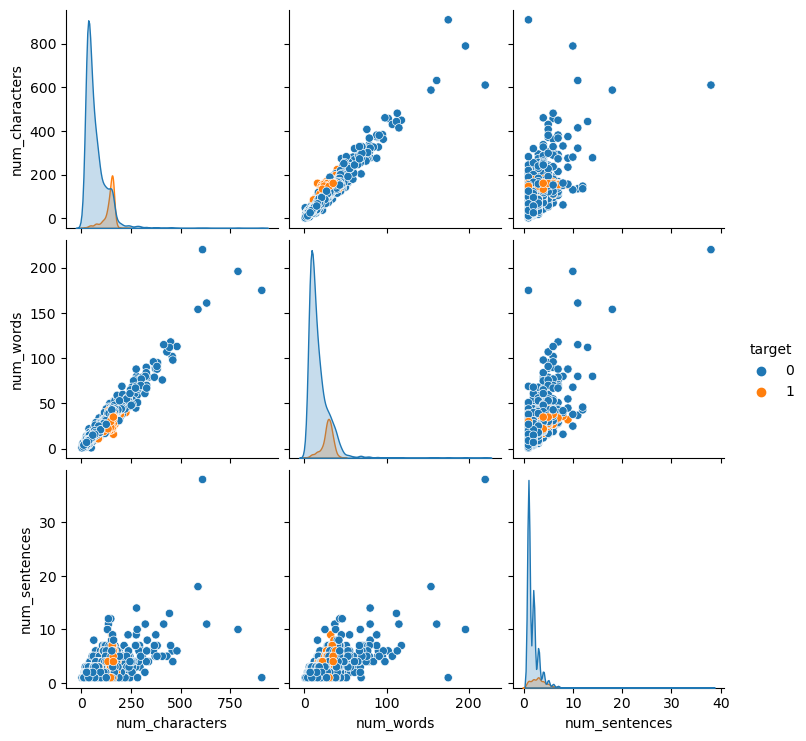

In [40]:
sns.pairplot(df,hue = 'target')

<Axes: >

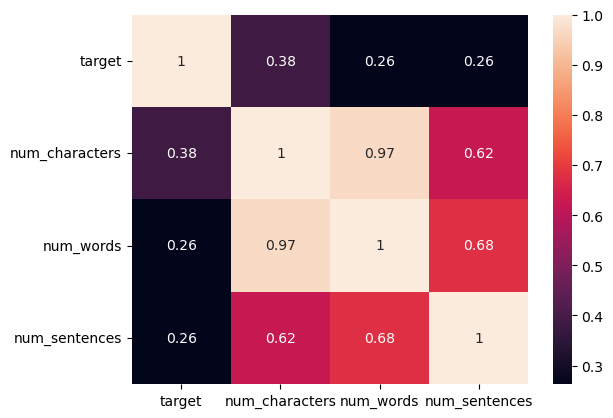

In [41]:
import pandas as pd
import seaborn as sns

# Assuming you have a DataFrame 'df' with columns including 'text', 'num_characters', 'num_words', and potentially others

# Drop non-numeric columns ('text' in this example) before computing correlations
numeric_df = df.drop('text', axis=1)

# Convert relevant columns to numeric type if needed
numeric_df['num_characters'] = pd.to_numeric(numeric_df['num_characters'])
numeric_df['num_words'] = pd.to_numeric(numeric_df['num_words'])

# Create the correlation heatmap for the remaining numeric columns
sns.heatmap(numeric_df.corr(), annot=True)




In [181]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

transformed_text = transform_text("I'm gonna be home soon and I don't want to talk about this stuff anymore tonight,k? I've cried enough today")
print(transformed_text)

gon na home soon want talk stuff anymor tonight k cri enough today


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Majors\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [182]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [183]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [184]:
df['transformed_text'] = df['text'].apply(transform_text)

In [191]:
df.head()

,target,text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


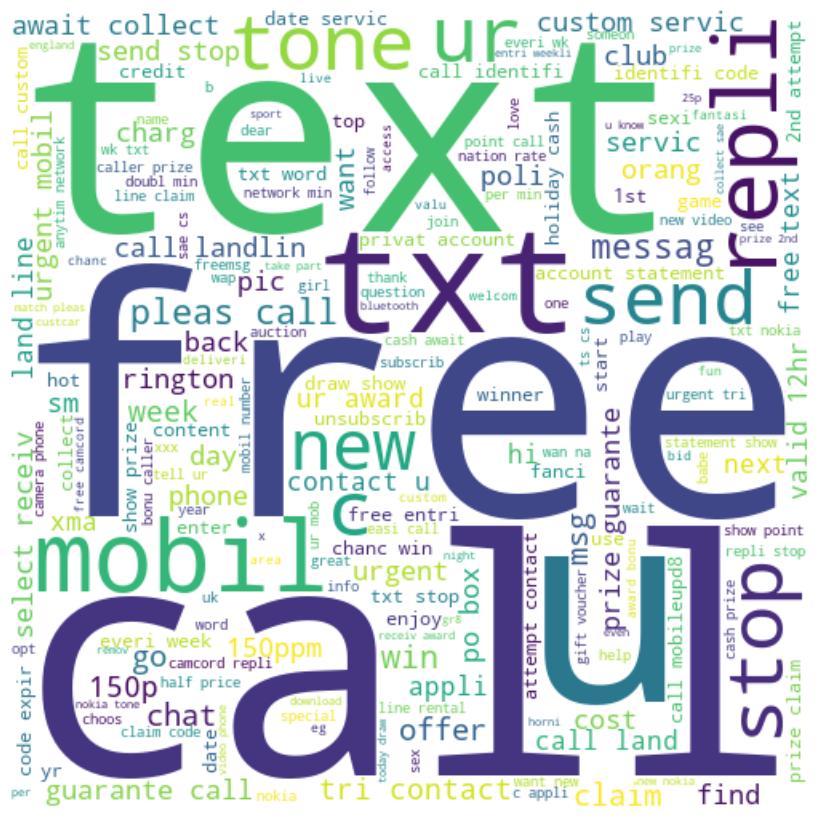

In [190]:
from wordcloud import WordCloud

# Assuming 'text' is the variable containing your text dat
text = df[df['target'] == 1]['transformed_text'].str.cat(sep=" ")
# Creating a WordCloud object and generating the word cloud
wc = WordCloud(width=500, height=500, background_color='white')
wordcloud_image = wc.generate(text)

# Setting the font size using the 'generate()' method
wordcloud_image = WordCloud(width=500, height=500, background_color='white').generate(text)

# Displaying the word cloud
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_image, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [189]:
df.head()

,target,text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [187]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [188]:
len(spam_corpus)

9939

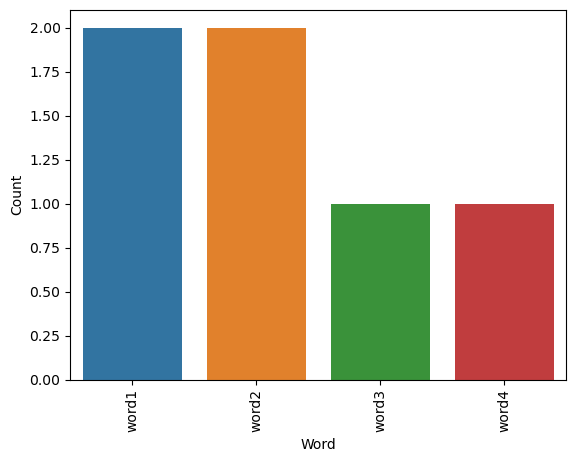

In [186]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'spam_corpus' is your data containing text for analysis
# Ensure 'spam_corpus' is a list of strings or words you want to analyze

# Example data (replace this with your 'spam_corpus' variable)
spam_corpus = ["word1", "word2", "word1", "word3", "word2", "word4"]

# Count occurrences in the corpus
word_counts = Counter(spam_corpus)
most_common_words = word_counts.most_common(30)

# Create a DataFrame from the most common words
df_most_common = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

# Create the bar plot using Seaborn
sns.barplot(x='Word', y='Count', data=df_most_common)
plt.xticks(rotation='vertical')
plt.show()


In [52]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [53]:
len(ham_corpus)

35404

In [56]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [57]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4.building the model

In [192]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()  # This is for CountVectorizer
tfidf = TfidfVectorizer(max_features=3000)  # This is for TfidfVectorizer


In [193]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [194]:
X.shape

(5169, 3000)

In [195]:
y = df['target'].values

In [196]:
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [198]:
from sklearn.model_selection import train_test_split

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
    random_state=2
)

In [200]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [201]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9247371333702269
[[770 136]
 [  0 901]]
0.8688524590163934


In [202]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9723298284449363
[[877  29]
 [ 21 880]]
0.9680968096809681


In [203]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9789706696181516
[[906   0]
 [ 38 863]]
1.0


In [204]:
!pip install xgboost

In [205]:
from xgboost import XGBClassifier

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [206]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [208]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [209]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9540675152185943, 0.9605855855855856)

In [210]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    
    print("For",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy -  0.9540675152185943
Precision -  0.9605855855855856
For KN
Accuracy -  0.6508024349750968
Precision -  0.5891677675033025
For NB
Accuracy -  0.9723298284449363
Precision -  0.9680968096809681
For DT
Accuracy -  0.9014941892639734
Precision -  0.9150401836969001
For LR
Accuracy -  0.9374654122855561
Precision -  0.9679334916864608
For RF
Accuracy -  0.9872717210846708
Precision -  0.9932584269662922
For AdaBoost
Accuracy -  0.961261759822911
Precision -  0.9837019790454016
For BgC
Accuracy -  0.9684560044272275
Precision -  0.9547413793103449
For ETC
Accuracy -  0.9894853348090759
Precision -  0.9921875
For GBDT
Accuracy -  0.9275041505257332
Precision -  0.9487179487179487
For xgb
Accuracy -  0.9673491975650249
Precision -  0.9762443438914027


In [211]:
perfomance_df = pd.DataFrame({'Algorithm' : clfs.keys(),'Accuracy' : accuracy_scores,'Precision' : precision_scores}).sort_values('Precision')

In [212]:
perfomance_df

,Algorithm,Accuracy,Precision
1,KN,0.650802,0.589168
3,DT,0.901494,0.915040
9,GBDT,0.927504,0.948718
7,BgC,0.968456,0.954741
0,SVC,0.954068,0.960586
4,LR,0.937465,0.967933
2,NB,0.972330,0.968097
10,xgb,0.967349,0.976244
6,AdaBoost,0.961262,0.983702
8,ETC,0.989485,0.992188


In [213]:
perfomance_df1 = pd.melt(perfomance_df,id_vars = "Algorithm")

In [214]:
perfomance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.650802
1,DT,Accuracy,0.901494
2,GBDT,Accuracy,0.927504
3,BgC,Accuracy,0.968456
4,SVC,Accuracy,0.954068
5,LR,Accuracy,0.937465
6,NB,Accuracy,0.972330
7,xgb,Accuracy,0.967349
8,AdaBoost,Accuracy,0.961262
9,ETC,Accuracy,0.989485


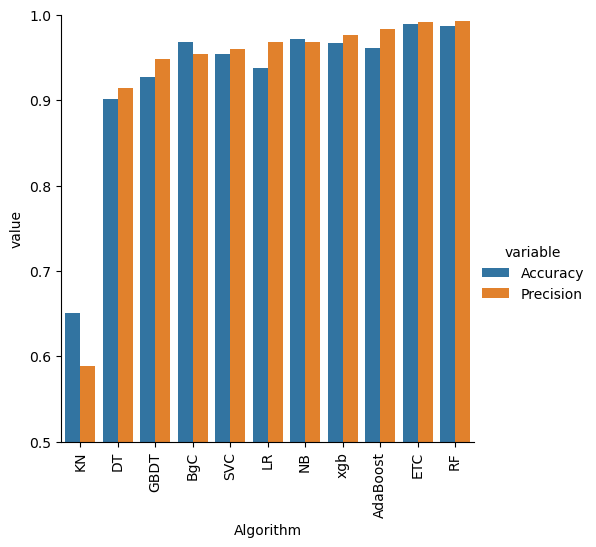

In [215]:
sns.catplot(x='Algorithm',y='value',hue='variable',data = perfomance_df1,kind = 'bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation = 'vertical')
plt.show()

In [216]:
#model improve

In [217]:
temp_df = pd.DataFrame({'Algorithm' : clfs.keys(),'Accuracy_max_ft_3000' : accuracy_scores,'Precision_max_feet_3000' : precision_scores}).sort_values('Precision_max_feet_3000')

In [218]:
new_df = perfomance_df.merge(temp_df,on='Algorithm')

In [219]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [220]:
temp_df = pd.DataFrame({'Algorithm' : clfs.keys(),'Accuracy_num_chars' : accuracy_scores,'Precision_num_chars' : precision_scores}).sort_values('Precision_num_chars')

In [221]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_feet_3000_x,Accuracy_max_ft_3000_y,Precision_max_feet_3000_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.650802,0.589168,0.650802,0.589168,0.650802,0.589168,0.650802,0.589168
1,DT,0.901494,0.915040,0.901494,0.915040,0.901494,0.915040,0.901494,0.915040
2,GBDT,0.927504,0.948718,0.927504,0.948718,0.927504,0.948718,0.927504,0.948718
3,BgC,0.968456,0.954741,0.968456,0.954741,0.968456,0.954741,0.968456,0.954741
4,SVC,0.954068,0.960586,0.954068,0.960586,0.954068,0.960586,0.954068,0.960586
5,LR,0.937465,0.967933,0.937465,0.967933,0.937465,0.967933,0.937465,0.967933
6,NB,0.972330,0.968097,0.972330,0.968097,0.972330,0.968097,0.972330,0.968097
7,xgb,0.967349,0.976244,0.967349,0.976244,0.967349,0.976244,0.967349,0.976244
8,AdaBoost,0.961262,0.983702,0.961262,0.983702,0.961262,0.983702,0.961262,0.983702
9,ETC,0.989485,0.992188,0.989485,0.992188,0.989485,0.992188,0.989485,0.992188


In [222]:
#Voting classifier

svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50 , random_state=2)

from sklearn.ensemble import VotingClassifier

In [223]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [224]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [225]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9833978970669618
Precision 0.9855072463768116


In [226]:
#apply stacking
estimators = [('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [227]:
from sklearn.ensemble import StackingClassifier

In [228]:
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9673491975650249
Precision 0.9762443438914027


In [229]:
import pickle
pickle.dump(tfidf,open('vectorizer.pk1','wb'))
pickle.dump(mnb,open('model.pk1','wb'))

In [230]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

X_train = ["Sample text 1","Sample text 2","Sample text 3"] 
y_train = [0,1,0]

tfidf = TfidfVectorizer(lowercase=True,stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)

mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

with open("vectorizer.pk1","wb") as vectorizer_file:
    pickle.dump(tfidf,vectorizer_file)

with open("model.pk1","wb") as model_file:
    pickle.dump(mnb,model_file)